In [1]:
import pandas as pd
import sqlite3

# Phase 1

## Is it possible to classify baseball players into Major League Baseball Eras based on their seasonal performance statistics?

# Extract Data

In [3]:
# Select random 250 from different 'Eras' in Major League Baseball history

conn = sqlite3.connect('lahmansbaseballdb.sqlite')

EarlyEraRandom250 = pd.read_sql_query("SELECT * FROM Batting WHERE yearID <= 1899 and AB >= 300 ORDER BY RANDOM() LIMIT 250", conn)

DeadBallEraRandom250 = pd.read_sql_query("SELECT * FROM Batting WHERE yearID>=1900 and yearID<=1918 and AB>=300 ORDER BY RANDOM() LIMIT 250", conn)

SteriodRandom250 = pd.read_sql_query("SELECT * FROM Batting WHERE yearID >= 1990 and yearID <= 2008 and AB >= 300 ORDER BY RANDOM() LIMIT 250", conn)

JuicedBallEraRandom250 = pd.read_sql_query("SELECT * FROM Batting WHERE yearID >= 2017 and AB >= 300 ORDER BY RANDOM() LIMIT 250", conn)

conn.commit()


# Exploratory Data Analysis & Data Preparation

In [4]:
# print list of all columns in batting data
print(list(EarlyEraRandom250))

['ID', 'playerID', 'yearID', 'stint', 'teamID', 'team_ID', 'lgID', 'G', 'G_batting', 'AB', 'R', 'H', '2B', '3B', 'HR', 'RBI', 'SB', 'CS', 'BB', 'SO', 'IBB', 'HBP', 'SH', 'SF', 'GIDP']


In [16]:
# print top 5 rows of a dataframe
DeadBallEraRandom250.head()

,ID,playerID,yearID,stint,teamID,team_ID,lgID,G,G_batting,AB,...,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP
0,9830,callani01,1905,1,CHA,451,AL,96,None,345,...,43,26,NaN,29,42.0,None,4,10,None,None
1,11171,dahlebi01,1908,1,BSN,498,NL,144,None,524,...,48,10,NaN,35,45.0,None,8,21,None,None
2,15156,turnete01,1914,1,CLE,602,AL,121,None,428,...,33,17,13.0,44,36.0,None,2,38,None,None
3,17533,sislege01,1918,1,SLA,685,AL,114,None,452,...,41,45,NaN,40,17.0,None,5,9,None,None
4,16056,bancrda01,1916,1,PHI,651,NL,142,None,477,...,33,15,NaN,74,57.0,None,4,16,None,None


In [7]:
# look for null values
DeadBallEraRandom250.isnull().sum(axis = 0)

ID             0
playerID       0
yearID         0
stint          0
teamID         0
team_ID        0
lgID           0
G              0
G_batting    250
AB             0
R              0
H              0
2B             0
3B             0
HR             0
RBI            0
SB             0
CS           223
BB             0
SO            12
IBB          250
HBP            0
SH             0
SF           250
GIDP         250
dtype: int64

There are 12 null values in the SO column (strikouts).  12 / 250 = 4.8%

In [19]:
# Fill SB NA values with column means
EarlyEraRandom250['SB'].fillna((EarlyEraRandom250['SB'].mean()), inplace=True)
EarlyEraRandom250['RBI'].fillna((EarlyEraRandom250['RBI'].mean()), inplace=True)
EarlyEraRandom250['SO'].fillna((EarlyEraRandom250['SO'].mean()), inplace=True)

DeadBallEraRandom250['SB'].fillna((DeadBallEraRandom250['SB'].mean()), inplace=True)
DeadBallEraRandom250['RBI'].fillna((DeadBallEraRandom250['RBI'].mean()), inplace=True)
DeadBallEraRandom250['SO'].fillna((DeadBallEraRandom250['SO'].mean()), inplace=True)

In [20]:
# Create column of numeric identifiers for each era
EarlyEraRandom250['ERA'] = 1
DeadBallEraRandom250['ERA'] = 2
SteriodRandom250['ERA'] = 3
JuicedBallEraRandom250['ERA'] = 4

In [21]:
# Concatenate the dataframes into a single dataframe
dataframes = [EarlyEraRandom250, DeadBallEraRandom250, SteriodRandom250, JuicedBallEraRandom250]
FinalDataFrame = pd.concat(dataframes)

In [22]:
# Calculate new variables
FinalDataFrame['1B'] = FinalDataFrame['H'] - FinalDataFrame['2B'] - FinalDataFrame['3B'] - FinalDataFrame['HR']
FinalDataFrame['BATAVE'] = (FinalDataFrame['H'] / FinalDataFrame['AB'])
FinalDataFrame['K_PERCENT'] = FinalDataFrame['SO'] / FinalDataFrame['AB']
FinalDataFrame['BASES_PER_HIT'] = (FinalDataFrame['1B'] + FinalDataFrame['2B']*2 + FinalDataFrame['3B']*3 + FinalDataFrame['HR']*4) / FinalDataFrame['H']

FinalDataFrame['BATAVE'] = round(FinalDataFrame['BATAVE'],3)
FinalDataFrame['K_PERCENT'] =  round(FinalDataFrame['K_PERCENT'],3)
FinalDataFrame['BASES_PER_HIT'] =  round(FinalDataFrame['BASES_PER_HIT'],3)
FinalDataFrame['SB'] =  round(FinalDataFrame['SB'],0)

In [24]:
# drop columns that are not needed for classification
FinalDataFrame.drop(['ID', 'playerID', 'yearID', 'stint', 'teamID', 'team_ID', 'lgID', 'G_batting', 'G', 'AB', 'H', '1B', '2B', 'R', 'CS', 'BB', 'IBB', 'HBP', 'SH', 'SF', 'GIDP'], axis=1)

,3B,HR,RBI,SB,SO,ERA,BATAVE,K_PERCENT,BASES_PER_HIT
0,13,3,109.0,19.0,10.000000,1,0.303,0.019,1.344
1,2,0,26.0,12.0,15.000000,1,0.222,0.050,1.164
2,8,3,63.0,12.0,10.000000,1,0.353,0.032,1.318
3,10,3,68.0,9.0,25.000000,1,0.301,0.048,1.310
4,5,1,49.0,57.0,29.044335,1,0.241,0.060,1.222
...,...,...,...,...,...,...,...,...,...
245,4,21,63.0,23.0,122.000000,4,0.264,0.205,1.618
246,2,2,30.0,1.0,51.000000,4,0.240,0.135,1.352
247,1,19,87.0,1.0,98.000000,4,0.272,0.200,1.774
248,3,9,40.0,5.0,110.000000,4,0.201,0.325,1.676


## Decision Tree Classification Algorithm

In [25]:
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

In [26]:
#split dataset in features and target variable
feature_columns = ['HR','K_PERCENT','SO','SB']

X = FinalDataFrame[feature_columns] # features (independent variables)
y = FinalDataFrame.ERA # target variable (dependent variable)

In [29]:
# Split dataset into training set and test set
# set test size to 30%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) 

In [45]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion="entropy", max_depth = 3)

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [46]:
# Model Accuracy = how often the classifier is correct
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.6033333333333334


In [47]:
#  import matplotlib and tree from sklearn
import matplotlib.pyplot as plt
from sklearn import tree 

[Text(837.0, 1426.95, 'X[1] <= 0.13\nentropy = 2.0\nsamples = 700\nvalue = [172, 179, 171, 178]'),
 Text(418.5, 1019.25, 'X[2] <= 38.5\nentropy = 1.471\nsamples = 367\nvalue = [168, 153, 42, 4]'),
 Text(209.25, 611.55, 'X[3] <= 27.5\nentropy = 1.166\nsamples = 234\nvalue = [149, 75, 8, 2]'),
 Text(104.625, 203.8499999999999, 'entropy = 1.36\nsamples = 135\nvalue = [62, 63, 8, 2]'),
 Text(313.875, 203.8499999999999, 'entropy = 0.533\nsamples = 99\nvalue = [87, 12, 0, 0]'),
 Text(627.75, 611.55, 'X[0] <= 4.5\nentropy = 1.447\nsamples = 133\nvalue = [19, 78, 34, 2]'),
 Text(523.125, 203.8499999999999, 'entropy = 0.751\nsamples = 77\nvalue = [9, 65, 3, 0]'),
 Text(732.375, 203.8499999999999, 'entropy = 1.577\nsamples = 56\nvalue = [10, 13, 31, 2]'),
 Text(1255.5, 1019.25, 'X[0] <= 5.5\nentropy = 1.383\nsamples = 333\nvalue = [4, 26, 129, 174]'),
 Text(1046.25, 611.55, 'X[1] <= 0.174\nentropy = 1.657\nsamples = 51\nvalue = [3, 22, 20, 6]'),
 Text(941.625, 203.8499999999999, 'entropy = 1.493

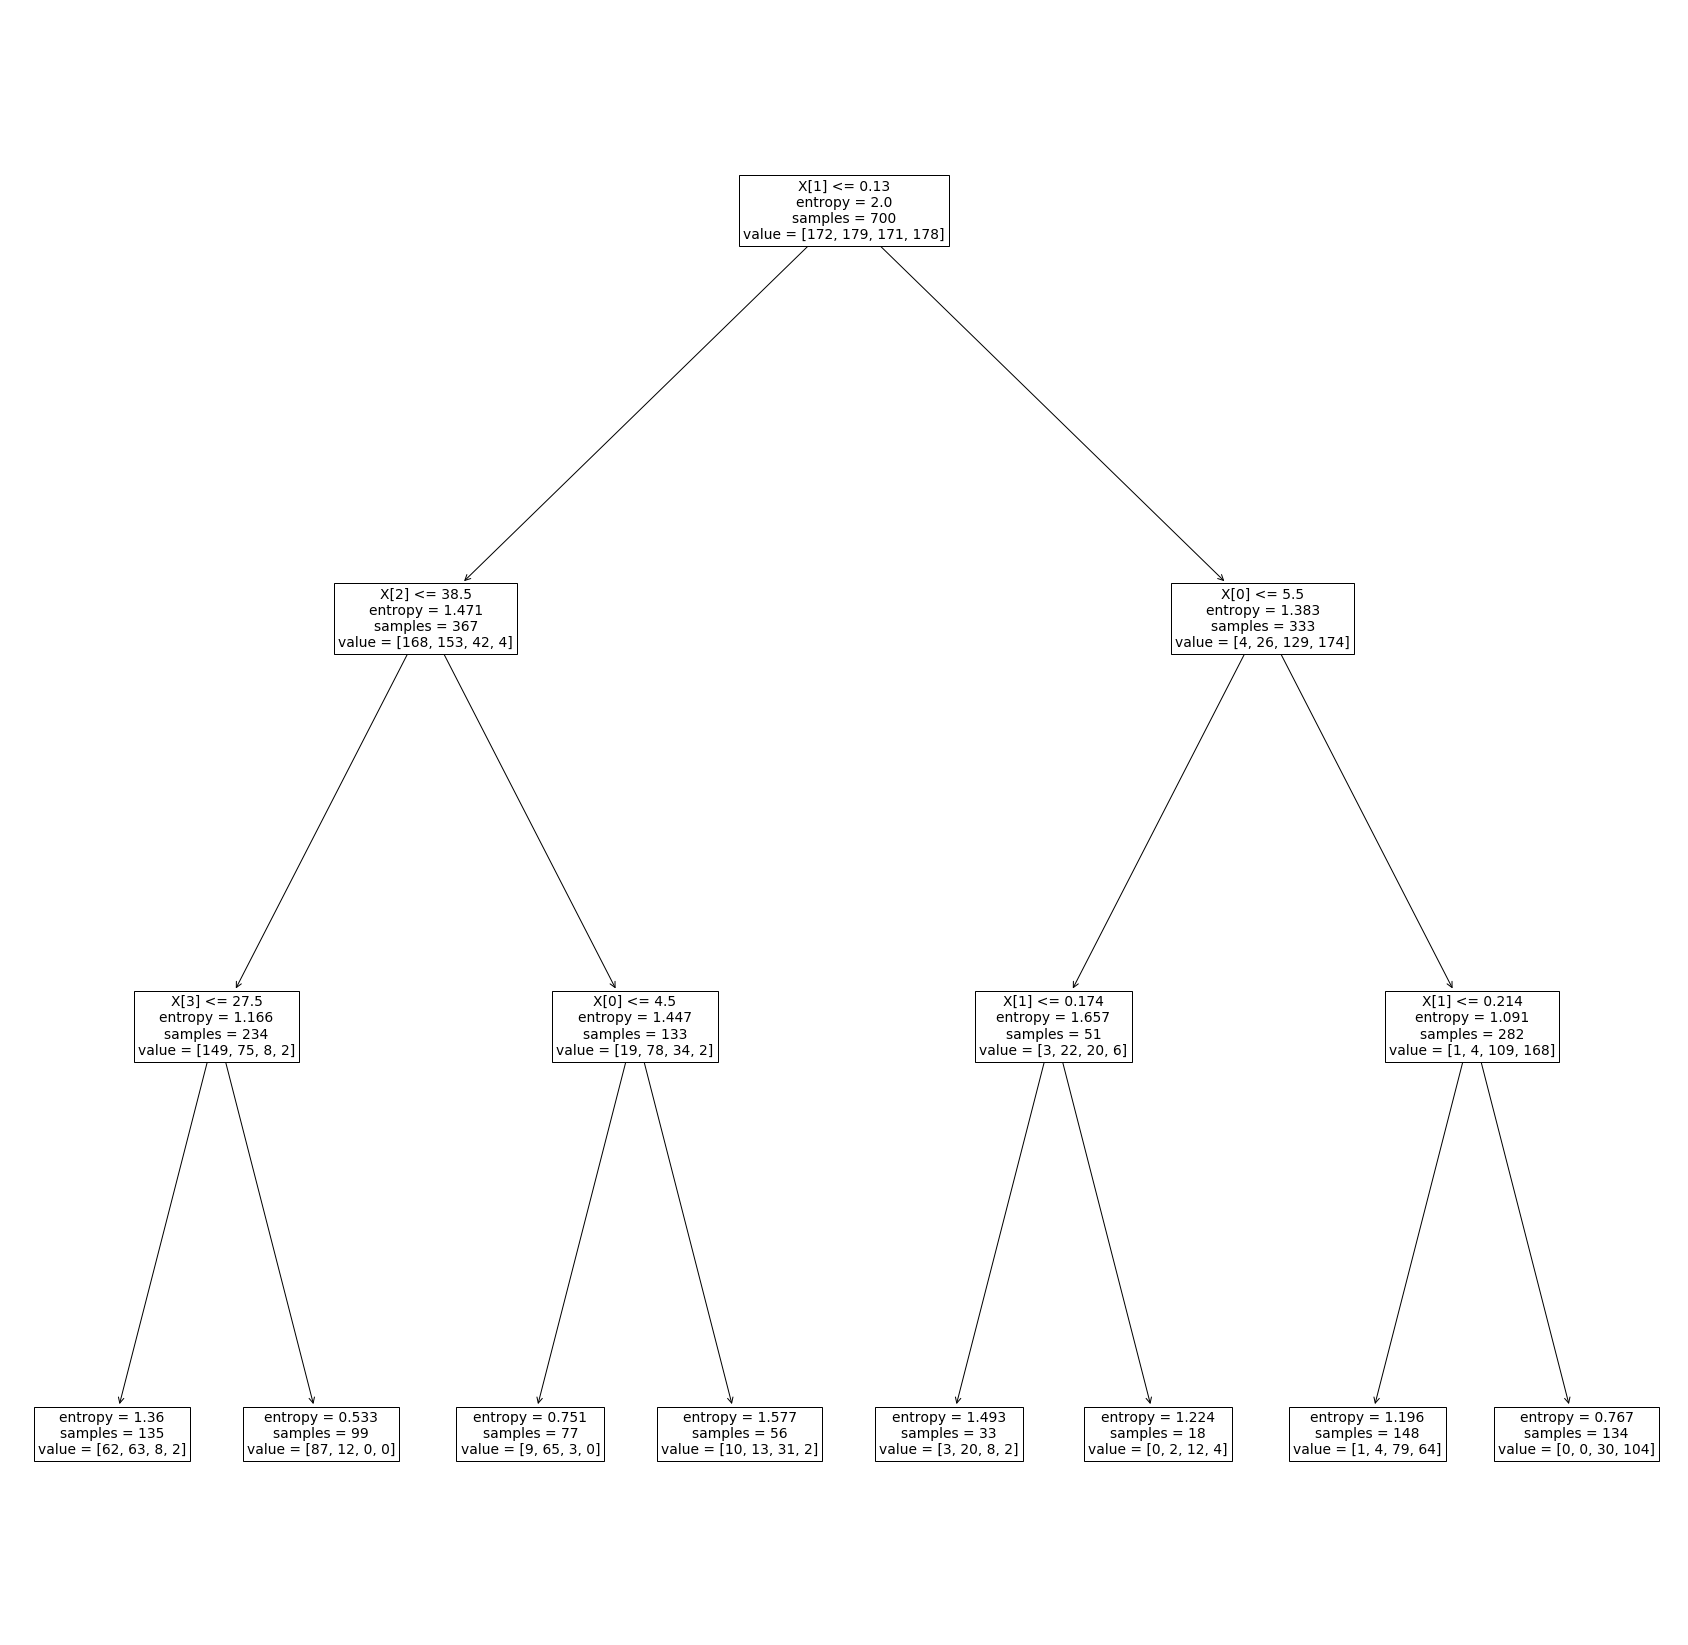

In [48]:
# plot the tree diagram
plt.figure(figsize = (30,30))
tree.plot_tree(clf)

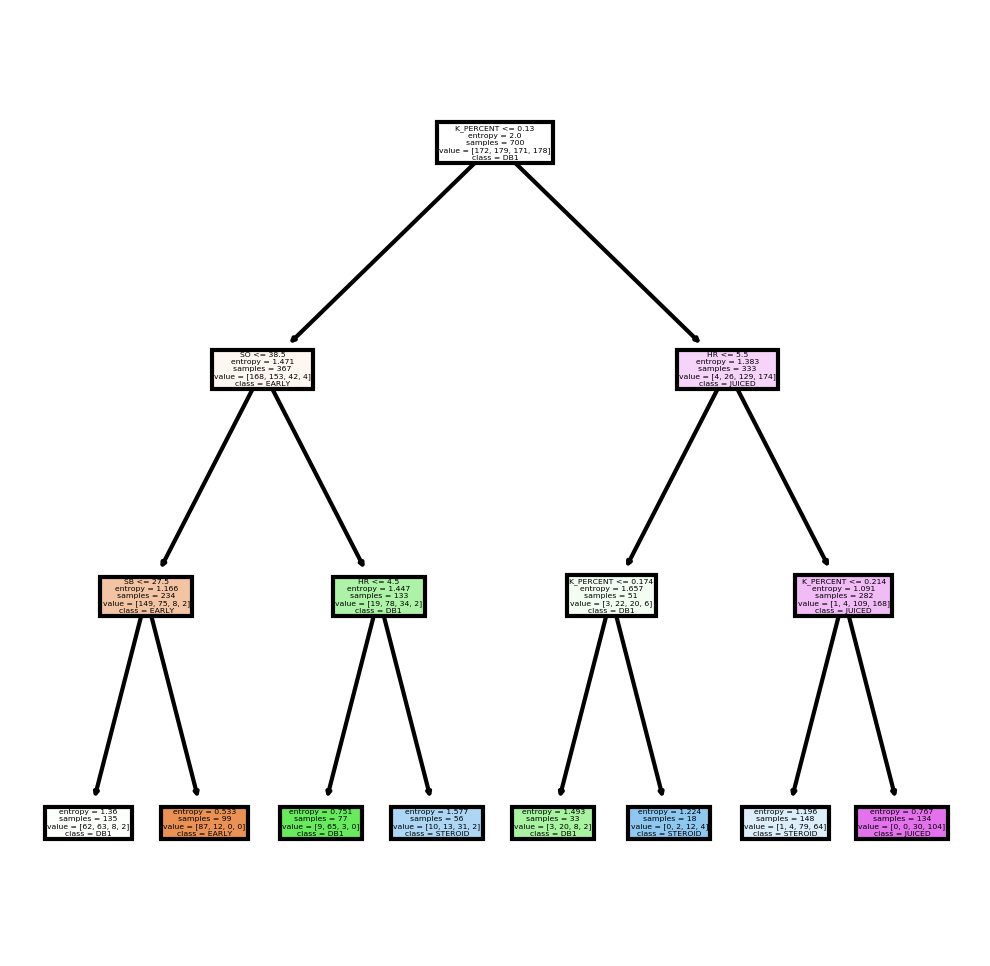

In [49]:
# Add feature names, class names, and color to the tree diagram

BB_features=['HR','K_PERCENT','SO','SB']
BB_class=['EARLY','DB1', 'STEROID', 'JUICED']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(clf,feature_names = BB_features, class_names=BB_class, filled = True);
fig.savefig('MLB_Era_Tree_Diagram.png')

# Phase 2

## Is it possible to classify players into Major League Baseball Eras with a Support Vector Machine Algorithm?

In [2]:
# import libraries
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt 
import numpy as np

# Extract Data

In [3]:
# Select random 250 from different 'Eras' in Major League Baseball history

conn = sqlite3.connect('lahmansbaseballdb.sqlite')

DeadBallEraRandom = pd.read_sql_query
("SELECT * FROM Batting WHERE yearID >= 1900 and yearID <= 1918 and AB >= 300 ORDER BY RANDOM() LIMIT 10", conn)

JuicedBallEraRandom = pd.read_sql_query
("SELECT * FROM Batting WHERE yearID >= 2017 and AB >= 300 ORDER BY RANDOM() LIMIT 10", conn)

conn.commit()

# Exploratory Data Analysis & Data Preparation

In [4]:
# Create column of numeric identifiers for each era
DeadBallEraRandom['ERA'] = 1
JuicedBallEraRandom['ERA'] = 2

# Fill missing values with column means
DeadBallEraRandom['SB'].fillna((DeadBallEraRandom['SB'].mean()), inplace=True)
DeadBallEraRandom['RBI'].fillna((DeadBallEraRandom['RBI'].mean()), inplace=True)
DeadBallEraRandom['SO'].fillna((DeadBallEraRandom['SO'].mean()), inplace=True)

# Calculate new variables
DeadBallEraRandom['1B'] = DeadBallEraRandom['H'] - DeadBallEraRandom['2B'] - DeadBallEraRandom['3B'] - DeadBallEraRandom['HR']
DeadBallEraRandom['BATAVE'] = (DeadBallEraRandom['H'] / DeadBallEraRandom['AB'])
DeadBallEraRandom['K_PERCENT'] = DeadBallEraRandom['SO'] / DeadBallEraRandom['AB']
DeadBallEraRandom['BASES_PER_HIT'] = (DeadBallEraRandom['1B'] + DeadBallEraRandom['2B']*2 + DeadBallEraRandom['3B']*3 + DeadBallEraRandom['HR']*4) / DeadBallEraRandom['H']
DeadBallEraRandom['BATAVE'] = round(DeadBallEraRandom['BATAVE'],3)
DeadBallEraRandom['K_PERCENT'] =  round(DeadBallEraRandom['K_PERCENT'],3)
DeadBallEraRandom['BASES_PER_HIT'] =  round(DeadBallEraRandom['BASES_PER_HIT'],3)
DeadBallEraRandom['SB'] =  round(DeadBallEraRandom['SB'],0)


# Calculate new variables
JuicedBallEraRandom['1B'] = JuicedBallEraRandom['H'] - JuicedBallEraRandom['2B'] - JuicedBallEraRandom['3B'] - JuicedBallEraRandom['HR']
JuicedBallEraRandom['BATAVE'] = (JuicedBallEraRandom['H'] / JuicedBallEraRandom['AB'])
JuicedBallEraRandom['K_PERCENT'] = JuicedBallEraRandom['SO'] / JuicedBallEraRandom['AB']
JuicedBallEraRandom['BASES_PER_HIT'] = (JuicedBallEraRandom['1B'] + JuicedBallEraRandom['2B']*2 + JuicedBallEraRandom['3B']*3 + JuicedBallEraRandom['HR']*4) / JuicedBallEraRandom['H']
JuicedBallEraRandom['BATAVE'] = round(JuicedBallEraRandom['BATAVE'],3)
JuicedBallEraRandom['K_PERCENT'] =  round(JuicedBallEraRandom['K_PERCENT'],3)
JuicedBallEraRandom['BASES_PER_HIT'] =  round(JuicedBallEraRandom['BASES_PER_HIT'],3)
JuicedBallEraRandom['SB'] =  round(JuicedBallEraRandom['SB'],0)


In [5]:
# Select feature variables
hr = DeadBallEraRandom['HR']
kpercent = DeadBallEraRandom ['K_PERCENT']

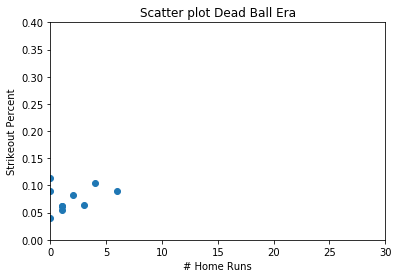

In [6]:
# Plot features for Dead Ball Era
plt.scatter(hr,kpercent)
plt.xlim(0,30)
plt.ylim(0,.4)
plt.title('Scatter plot Dead Ball Era')
plt.xlabel('# Home Runs')
plt.ylabel('Strikeout Percent')
plt.show()

In [8]:
# Select feature variables
hr = JuicedBallEraRandom['HR']
kpercent = JuicedBallEraRandom['K_PERCENT']

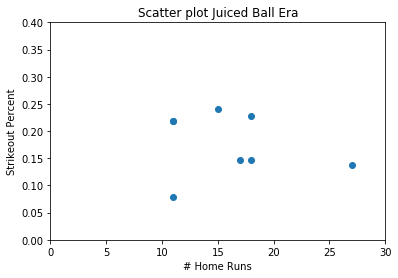

In [9]:
# Plot features for Juiced Ball Era
plt.scatter(hr,kpercent)
plt.xlim(0,30)
plt.ylim(0,.4)
plt.title('Scatter plot Juiced Ball Era')
plt.xlabel('# Home Runs')
plt.ylabel('Strikeout Percent')
plt.show() 

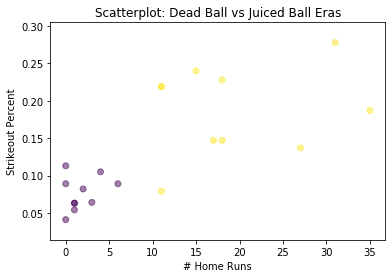

In [10]:
# Concatenate the dataframes into a single dataframe
dfs = [DeadBallEraRandom, JuicedBallEraRandom]
df = pd.concat(dfs)

hr = df['HR']
so = df['K_PERCENT']
col = df['ERA']


# Plot features for both Dead Ball and Juiced Ball Era
plt.scatter(hr, so, c = col, alpha = 0.5)

plt.title('Scatterplot: Dead Ball vs Juiced Ball Eras')
plt.xlabel('# Home Runs')
plt.ylabel('Strikeout Percent')
plt.show()  

# Support Vector Machine Classification Algorithm

In [11]:
# identify feature variables
vars = ['HR', 'K_PERCENT']
X = df[vars]
y = df['ERA']

# import sklean library
from sklearn.svm import SVC

# define linear classifer and fit the model
clf = SVC(kernel='linear')
model = clf.fit(X, y)
model

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [12]:
# test points for prediction

prediction = clf.predict([[44, .25]])
prediction

array([2], dtype=int64)

In [13]:
# test points for prediction

prediction = clf.predict([[2, .06]])
prediction

array([1], dtype=int64)

In [14]:
# show support vectors
model.support_vectors_

array([[ 6.   ,  0.089],
       [11.   ,  0.079]])

In [15]:
model.support_

array([ 0, 15])

In [16]:
# show number of support vectors for each class
model.n_support_

array([1, 1])

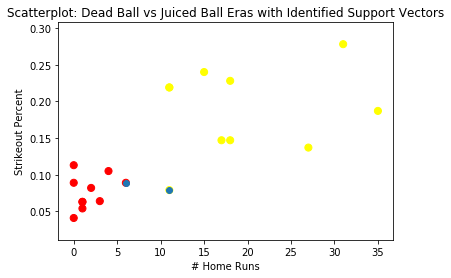

In [19]:
# plot the Dead Ball and Juiced Ball era data and highlight support vectors

plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, s=50, cmap='autumn')
plt.scatter(model.support_vectors_[:,0],model.support_vectors_[:,1])

plt.title('Scatterplot: Dead Ball vs Juiced Ball Eras with Identified Support Vectors')
plt.xlabel('# Home Runs')
plt.ylabel('Strikeout Percent')

plt.show()  

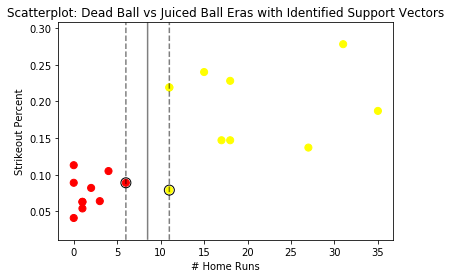

In [20]:
# plot the Dead Ball and Juiced Ball era data and highlight support vectors & hyperplane


ax = plt.gca()
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, s=50, cmap='autumn')
xlim = ax.get_xlim()
ylim = ax.get_ylim()

xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = model.decision_function(xy).reshape(XX.shape)

ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
           linestyles=['--', '-', '--'])

ax.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1], s=100,
           linewidth=1, facecolors='none', edgecolors='k')


plt.title('Scatterplot: Dead Ball vs Juiced Ball Eras with Identified Support Vectors')
plt.xlabel('# Home Runs')
plt.ylabel('Strikeout Percent')
plt.show()  